In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
from datetime import datetime
%matplotlib inline

In [2]:
# specify our start and end date using datetime
start = datetime(2015, 1 , 1)
end = datetime(2020, 12, 11)

In [3]:
#Import Stocks Data from Yahoo Finance
FB   = web.DataReader("FB",   'yahoo', start, end)
NVDA = web.DataReader("NVDA", 'yahoo', start, end)
MSFT = web.DataReader("MSFT", 'yahoo', start, end)
JNJ  = web.DataReader("JNJ",  'yahoo', start, end)
TSLA = web.DataReader("TSLA", 'yahoo', start, end)
 
# create new dataframe with just closing price for each stock
df = pd.DataFrame({'FB': FB['Adj Close'],
                   'NVDA': NVDA['Adj Close'], 'MSFT': MSFT['Adj Close'],
                    'JNJ': JNJ['Adj Close'], 'TSLA':TSLA['Adj Close']})

df.tail()


,FB,NVDA,MSFT,JNJ,TSLA
Date,,,,,
2020-12-07,285.579987,544.270020,214.289993,148.970001,641.760010
2020-12-08,283.399994,534.000000,216.009995,151.550003,649.880005
2020-12-09,277.920013,517.229980,211.800003,153.100006,604.479980
2020-12-10,277.119995,518.890015,210.520004,152.250000,627.070007
2020-12-11,273.549988,520.530029,213.259995,152.949997,609.989990


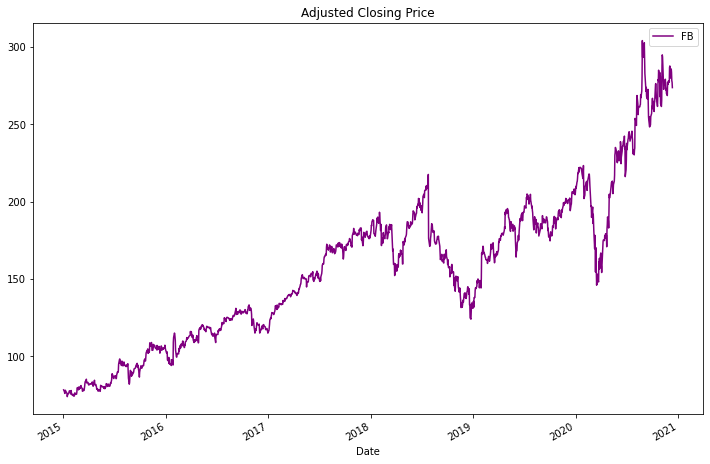

In [4]:
#plot stocks and their Adjusted Closing Price during start and end dates 
FB['Adj Close'].plot(label='FB',figsize=(12,8), title = 'Adjusted Closing Price', color='purple')
plt.legend()

<AxesSubplot:title={'center':'Adjusted Closing Price'}, xlabel='Date'>

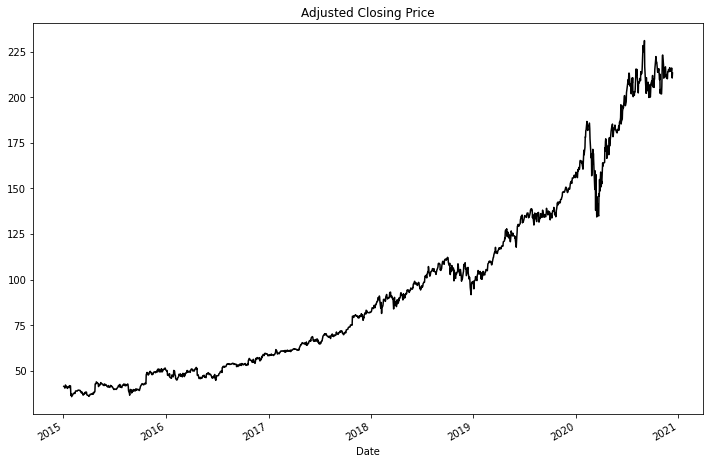

In [5]:
MSFT['Adj Close'].plot(label='MSFT',figsize=(12,8), title = 'Adjusted Closing Price',color='black')

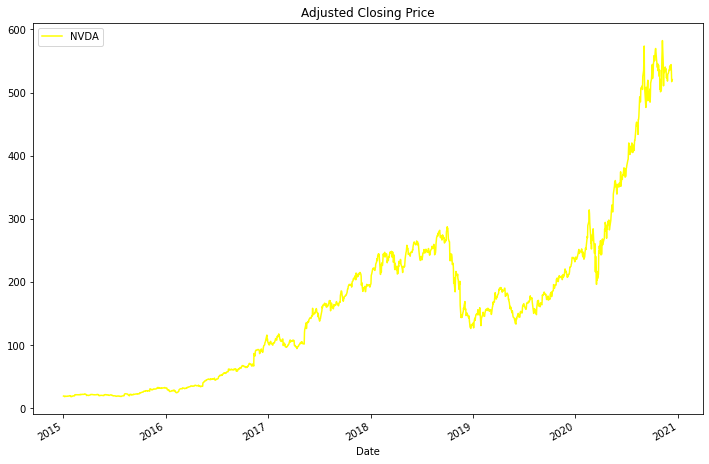

In [6]:
NVDA['Adj Close'].plot(label='NVDA',figsize=(12,8), title = 'Adjusted Closing Price', color='yellow')
plt.legend()

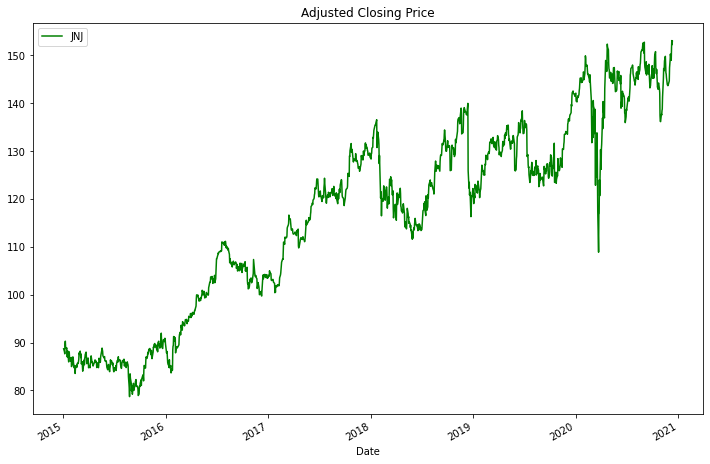

In [7]:
JNJ['Adj Close'].plot(label='JNJ',figsize=(12,8), title = 'Adjusted Closing Price', color='green')
plt.legend()

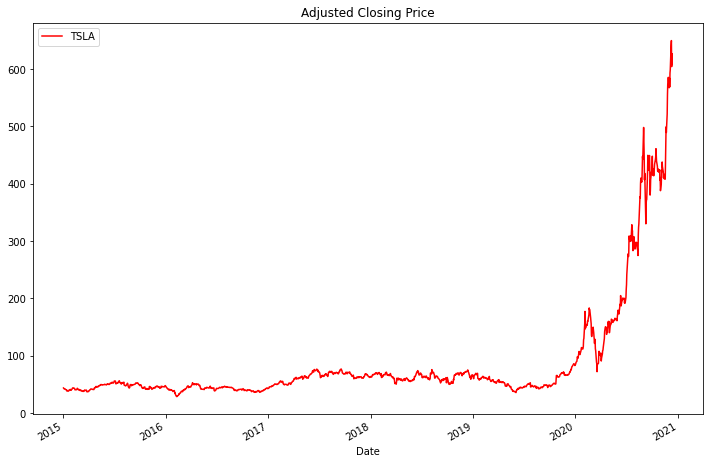

In [8]:
TSLA['Adj Close'].plot(label='TSLA',figsize=(12,8), title = 'Adjusted Closing Price', color='red')
plt.legend()

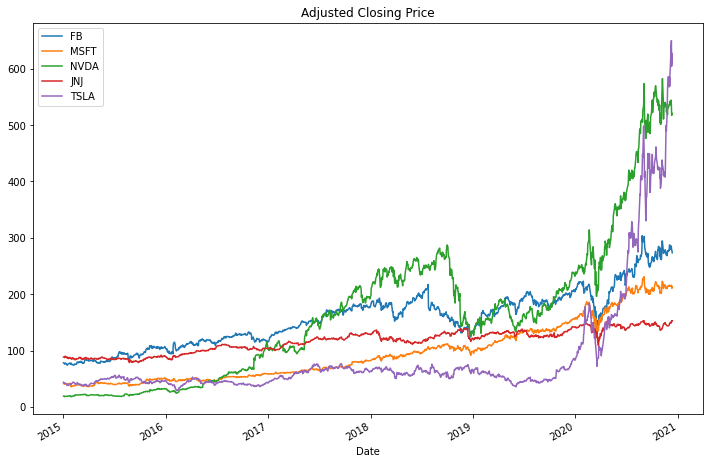

In [9]:
FB['Adj Close'].plot(label='FB',figsize=(12,8), title = 'Adjusted Closing Price')
MSFT['Adj Close'].plot(label='MSFT')
NVDA['Adj Close'].plot(label='NVDA')
JNJ['Adj Close'].plot(label='JNJ')
TSLA['Adj Close'].plot(label = 'TSLA')
plt.legend()

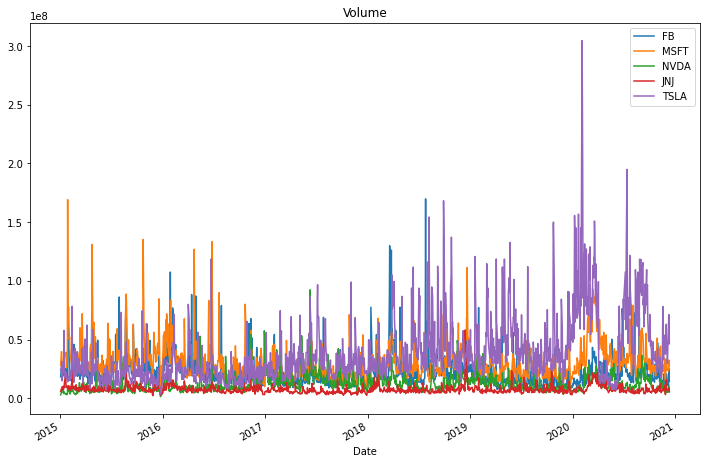

In [10]:
#plot stocks and their volume traded during start and end dates 
FB['Volume'].plot(label='FB',figsize=(12,8), title = 'Volume')
MSFT['Volume'].plot(label='MSFT')
NVDA['Volume'].plot(label='NVDA')
JNJ['Volume'].plot(label='JNJ')
TSLA['Volume'].plot(label = 'TSLA')
plt.legend()

Text(0, 0.5, 'Return From Start Price')

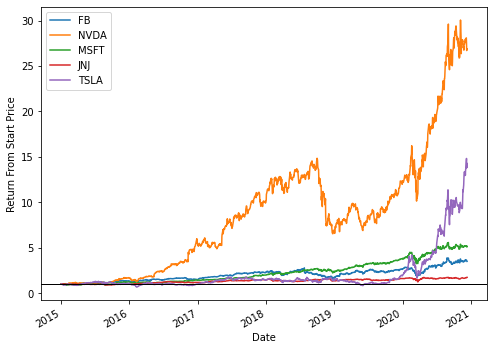

In [11]:
#normalise our stocks, by dividing all the closing price to the first closing price in the period
#to replicate if you were to buy all these stocks at the same start date, each stock increased nicely especially NVDA
startP = df.apply(lambda x: x / x[0])
startP.plot(figsize=(8,6)).axhline(1, lw=1, color='black')
plt.ylabel('Return From Start Price')

Text(0, 0.5, 'Daily Percentage Return')

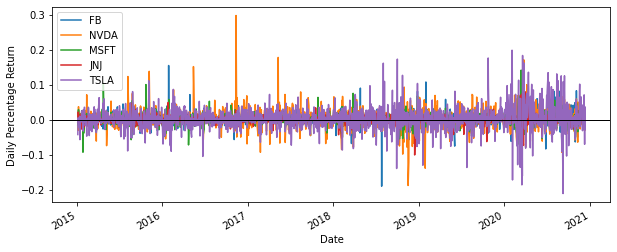

In [12]:
# plot daily percentage change of stock price.
df2=df.pct_change()
df2.plot(figsize=(10,4))
plt.axhline(0, color='black', lw=1)
plt.ylabel('Daily Percentage Return')

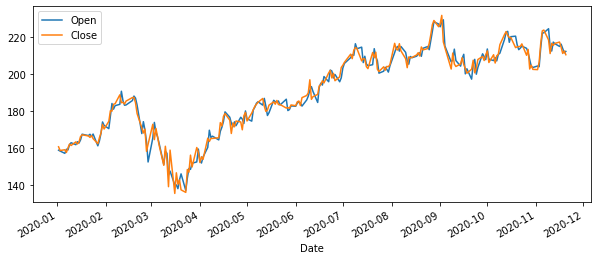

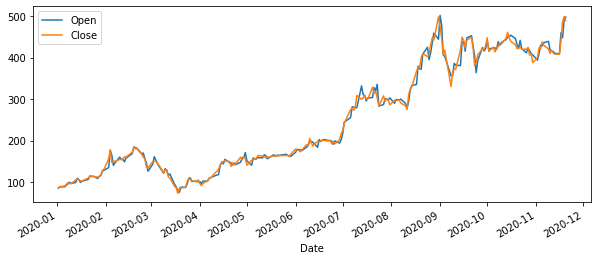

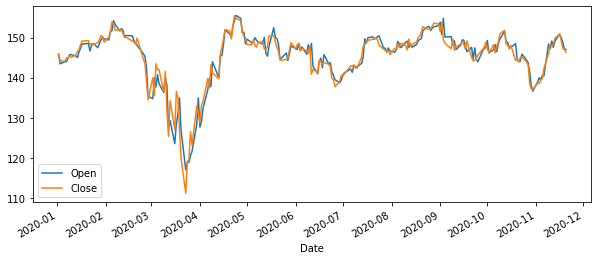

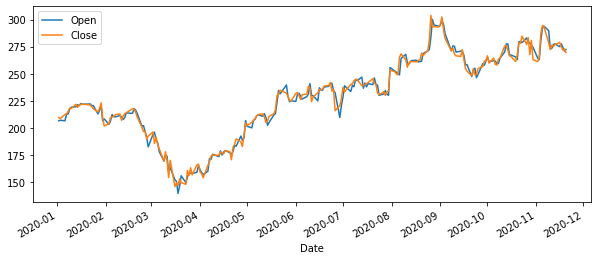

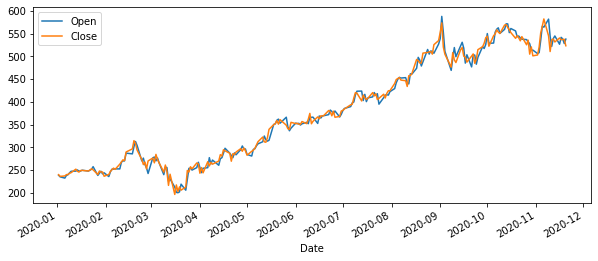

In [13]:
# plot open and close of each stock given duration to check for any major shifts
MSFT.loc['2020-01-01':'2020-11-20',['Open','Close']].plot(label='msft', figsize=(10,4));
TSLA.loc['2020-01-01':'2020-11-20',['Open','Close']].plot(figsize=(10,4));
JNJ.loc['2020-01-01':'2020-11-20',['Open','Close']].plot(figsize=(10,4));
FB.loc['2020-01-01':'2020-11-20',['Open','Close']].plot(figsize=(10,4));
NVDA.loc['2020-01-01':'2020-11-20',['Open','Close']].plot(figsize=(10,4));

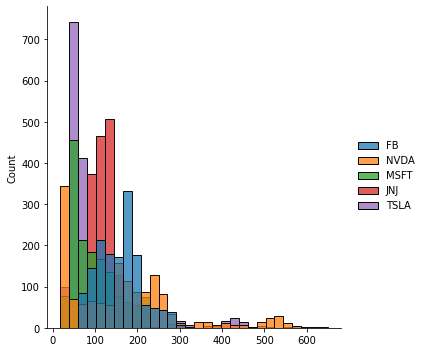

In [14]:
#histogram to show spread and distribution type
sns.displot(df.dropna(), bins=30, color="purple")